
L'idée va être de créer un indice de performance qui va nous permettre de
comparer les performances des différents joueurs de l'équipe. Pour cela, on va
utiliser les statistiques suivantes :
- le z-score de la vitesse maximale du joueur
- le z-score de la distance m/min du joueur
- le z-score du taux de présence du joueur
- le z-score de l'accélération du joueur

On va créer un dataframe avec une ligne par joueur et les colonnes suivantes :
- la vitesse maximale
- la distance m/min
- le taux de présence
- l'accélération

ainsi que leurs z-scores respectifs (et un z-score total ?)

In [349]:
## ------ Importing Libraries ------ ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [350]:
match_played = pd.read_csv("/Users/cosaph/Desktop/fc servette/Coralie/Match_player/Export Servette Pro - all games.csv")
all_training = pd.read_csv("/Users/cosaph/Desktop/fc servette/Coralie/Export Servette Pro - all training.csv")

# créer un nouveau dataframe
df = pd.DataFrame()

# ajouter les colonnes nécessaires

# prendre le max et faire un groupby par joueur
df['Max_speed'] = match_played.groupby('PLAYER_NAME')['Vmax'].max()
df['Accélération max'] = match_played.groupby('PLAYER_NAME')['Accélération max'].max()


#df['Accélération max']

#print(df)

In [351]:
# je veux les distance m/Min ou le joueeur a joué plus de 60 minutes

matchs = match_played[match_played['DURATION'] > 60]

# maintenat je veux prendre le max de distance m/min pour chaque joueur

distance_mmin = matchs.groupby('PLAYER_NAME')['Distance m/min'].max()
#print(distance_mmin)

df['Distance_m/min'] = distance_mmin

J'ai 42 joueur dans l'équipe donc on va calculer le z-score avec toutes les valeurs qu'on a pour par exemple distance m/min et les mettre dans la lignes du joueur.

In [352]:

players = all_training['PLAYER_NAME'].unique()
nombre_train = all_training['DATE'].nunique()


# Boucle pour chaque joueur
for player in players:
    attendance_player = all_training[all_training['PLAYER_NAME'] == player]['ATTENDANCE'].value_counts()
    
    if isinstance(attendance_player, pd.Series):
        attendance_player = attendance_player.reindex(['PRESENT', 'ADAPTE', 'BLESSE', 'READAPTATION', 'REPOS', 'EN SOIN', 'MALADE', 'ABSENT'], fill_value=0)
    
    attendance_player_sum = attendance_player.sum()

    present_player = attendance_player['PRESENT']
    
    pourcentage_present = (present_player / attendance_player_sum) * 100 if attendance_player_sum > 0 else 0


    df.loc[player, 'Attendance'] = pourcentage_present
    
#print(df)
    
#save the csv 
    


In [353]:
# maintenant on va calculer un z-score pour chacune des variables et le mettre dans data2.csv
df['PLAYER_NAME'] = df.index
df['Max_speed_z'] = (df['Max_speed'] - df['Max_speed'].mean()) / df['Max_speed'].std()
df['Accélération max_z'] = (df['Accélération max'] - df['Accélération max'].mean()) / df['Accélération max'].std()
df['Distance_m/min_z'] = (df['Distance_m/min'] - df['Distance_m/min'].mean()) / df['Distance_m/min'].std()
df['Attendance_z'] = (df['Attendance'] - df['Attendance'].mean()) / df['Attendance'].std()


In [354]:
player = "L.Besson"
player_data = df.loc[player]
print(player_data)

Max_speed                   NaN
Accélération max            NaN
Distance_m/min              NaN
Attendance            70.520231
PLAYER_NAME            L.Besson
Max_speed_z                 NaN
Accélération max_z          NaN
Distance_m/min_z            NaN
Attendance_z          -0.055917
Name: L.Besson, dtype: object


In [355]:
acc_mean = df['Accélération max_z'].mean(skipna=True)
speed_mean = df['Max_speed_z'].mean(skipna=True)
distance_mean = df['Distance_m/min_z'].mean(skipna=True)
attendance_mean = df['Attendance_z'].mean(skipna=True)

print(acc_mean, speed_mean, distance_mean, attendance_mean)

0.0 -1.8914910789910075e-16 2.1239049166742126e-16 7.553481649681869e-16


In [356]:
# ne font plus partis de l'équipe

print(df.columns)

df = df.loc[~df['PLAYER_NAME'].isin(['N.Vouilloz', 'P.Pflücke', 'J.Onguene', 'B.Fofana', 'R.Rodelin'])]



Index(['Max_speed', 'Accélération max', 'Distance_m/min', 'Attendance',
       'PLAYER_NAME', 'Max_speed_z', 'Accélération max_z', 'Distance_m/min_z',
       'Attendance_z'],
      dtype='object')


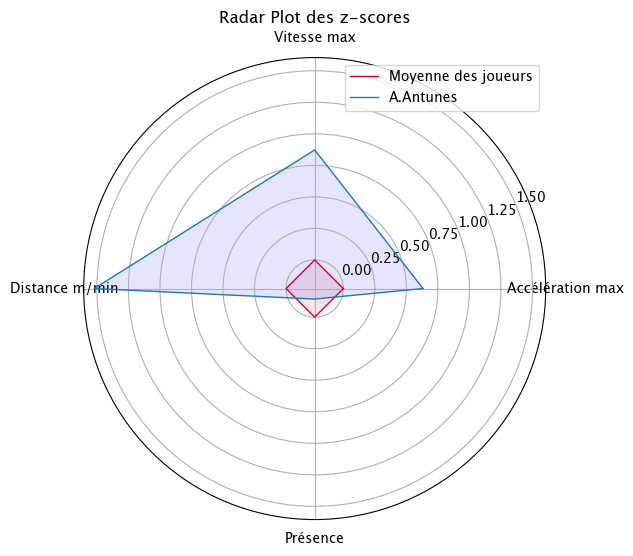

In [357]:

from math import pi

# l'équipe
categories = ['Accélération max', 'Vitesse max', 'Distance m/min', 'Présence']
values_mean = [acc_mean, speed_mean, distance_mean, attendance_mean]
values_mean += values_mean[:1] 

# le joueur 
player = "A.Antunes"
player_data = df.loc[player]
values_player = player_data[['Accélération max_z', 'Max_speed_z', 'Distance_m/min_z', 'Attendance_z']].values.flatten().tolist()
values_player += values_player[:1] 


N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.xticks(angles[:-1], categories)


ax.plot(angles, values_mean, linewidth=1, linestyle='solid', label='Moyenne des joueurs', color='#D70232')
ax.fill(angles, values_mean, '#D70232', alpha=0.1)

ax.plot(angles, values_player, linewidth=1, linestyle='solid', label=player)
ax.fill(angles, values_player, 'b', alpha=0.1)

plt.title('Radar Plot des z-scores')
plt.legend(loc='upper right')

plt.show()


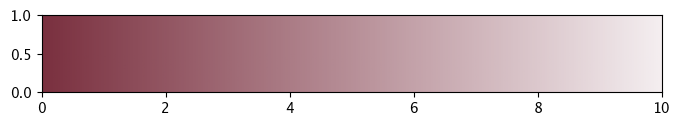

In [358]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Définition des couleurs
start_color = '#7a303f'
end_color = '#f4eef0'

# Création de la palette
n_colors = 256
colors = [plt.cm.viridis(i) for i in np.linspace(0, 1, n_colors)]

# Interpolation des couleurs
start_rgb = np.array([int(start_color[i:i+2], 16)/255 for i in (1, 3, 5)])
end_rgb = np.array([int(end_color[i:i+2], 16)/255 for i in (1, 3, 5)])
new_colors = np.array([mcolors.to_rgb(mcolors.rgb2hex(start_rgb + (end_rgb - start_rgb) * i / (n_colors - 1))) for i in range(n_colors)])

# Affichage de la palette
plt.figure(figsize=(8, 1))
plt.imshow([new_colors], extent=[0, 10, 0, 1], aspect='auto')
plt.show()

/var/folders/6l/ghb5053j4rg4ys8zwp_wnmjw0000gn/T/ipykernel_59180/1336377735.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_z', y=df.index, data=df, palette=new_colors)
/var/folders/6l/ghb5053j4rg4ys8zwp_wnmjw0000gn/T/ipykernel_59180/1336377735.py:21: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x='Total_z', y=df.index, data=df, palette=new_colors)
/var/folders/6l/ghb5053j4rg4ys8zwp_wnmjw0000gn/T/ipykernel_59180/1336377735.py:21: UserWarning: The palette list has more values (256) than needed (38), which may not be intended.
  sns.barplot(x='Total_z', y=df.index, data=df, palette=new_colors)


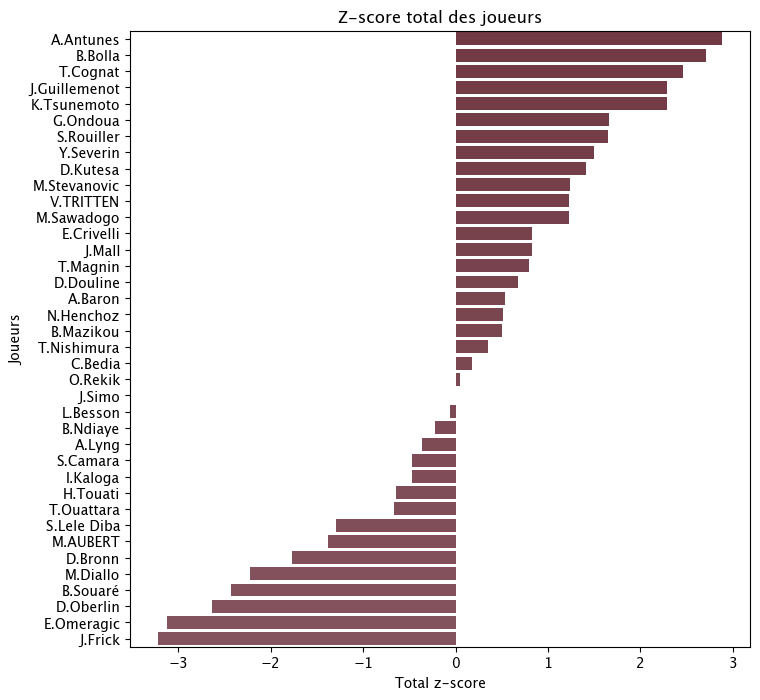

In [359]:
# Définition des couleurs
start_color = '#7a303f'
end_color = '#f4eef0'

# Création de la palette
n_colors = 256
colors = [plt.cm.viridis(i) for i in np.linspace(0, 1, n_colors)]

# Interpolation des couleurs
start_rgb = np.array([int(start_color[i:i+2], 16)/255 for i in (1, 3, 5)])
end_rgb = np.array([int(end_color[i:i+2], 16)/255 for i in (1, 3, 5)])
new_colors = np.array([mcolors.to_rgb(mcolors.rgb2hex(start_rgb + (end_rgb - start_rgb) * i / (n_colors - 1))) for i in range(n_colors)])

# Calcul du z-score total en ignorant les valeurs nulles
df['Total_z'] = df[['Max_speed_z', 'Accélération max_z', 'Distance_m/min_z', 'Attendance_z']].sum(axis=1, skipna=True)

# On trie les joueurs par leur z-score total en faisant un barre plot

df = df.sort_values('Total_z', ascending=False)
plt.figure(figsize=(8, 8))
sns.barplot(x='Total_z', y=df.index, data=df, palette=new_colors)
plt.xlabel('Total z-score')
plt.ylabel('Joueurs')
plt.title('Z-score total des joueurs')
plt.show()

df.to_csv("data.csv")